This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
mpgnames=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
mpgData=pd.read_csv('auto-mpg.data',header=0,names=mpgnames)
mpgData


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
394,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
mpgData.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
mpgData=mpgData.replace('?', np.NaN)

In [5]:
mpgData.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
mpgData['horsepower']= mpgData['horsepower'].fillna(mpgData['horsepower'].astype(float).mean())

In [7]:
mpgData['car name'].unique()

array(['buick skylark 320', 'plymouth satellite', 'amc rebel sst',
       'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       'dodge challenger se', "plymouth 'cuda 340",
       'chevrolet monte carlo', 'buick estate wagon (sw)',
       'toyota corona mark ii', 'plymouth duster', 'amc hornet',
       'ford maverick', 'datsun pl510', 'volkswagen 1131 deluxe sedan',
       'peugeot 504', 'audi 100 ls', 'saab 99e', 'bmw 2002',
       'amc gremlin', 'ford f250', 'chevy c20', 'dodge d200', 'hi 1200d',
       'chevrolet vega 2300', 'toyota corona', 'ford pinto',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 2000', 'opel 1900'

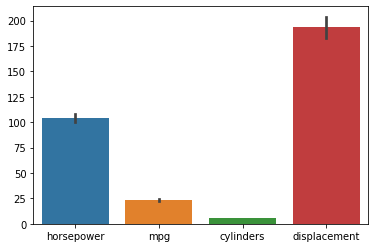

In [8]:
# Total 
sns.barplot( data=mpgData[['horsepower','mpg','cylinders','displacement']])

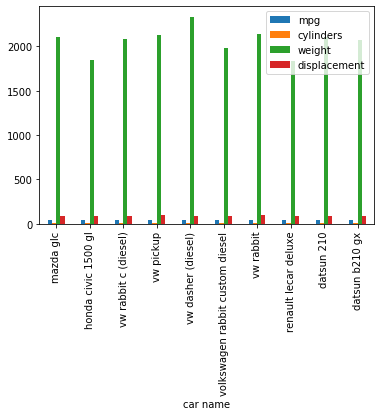

In [9]:
# Top 10 Confirmed States
mpgData[['horsepower','mpg','cylinders','weight','displacement','car name']].sort_values(by='mpg', ascending=False).head(10).plot.bar(x="car name")


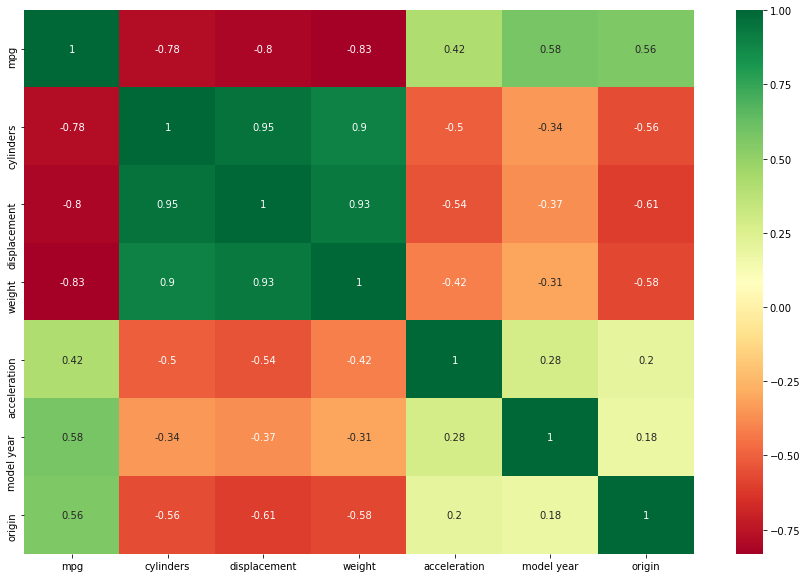

In [10]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=mpgData.corr(),annot=True,cmap="RdYlGn")

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
mpgData['car name'] = labelencoder.fit_transform(mpgData['car name'])

In [12]:
x=mpgData.drop(['mpg'],axis=1)
x.shape

(397, 8)

In [13]:
y=mpgData['mpg']
y=np.array(y).reshape(-1,1)

In [14]:
x.skew()

cylinders       0.533598
displacement    0.726982
horsepower      1.100434
weight          0.535347
acceleration    0.275880
model year      0.010233
origin          0.919911
car name        0.013775
dtype: float64

In [15]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

In [16]:
#Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
# calculating RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

3.0616383708037027

In [19]:
df = pd.DataFrame({'Actual': np.array(y_test)[:,0], 'Predicted': y_pred[:,0]})
df

,Actual,Predicted
0,15.0,13.607431
1,29.5,31.831820
2,33.5,28.535575
3,25.0,24.513251
4,13.0,12.348100
...,...,...
75,28.0,28.889396
76,23.5,27.031313
77,16.0,16.147875
78,17.0,15.295363


In [21]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(regressor,'AutoMpg_regressor_Model.obj')




['AutoMpg_regressor_Model.obj']

In [ ]:
# Conclusion
    Preparing the Linear Regression model for  MPG
    Null vaules has been replaced 
    we have been applied Label Encoder for Categorical Data 
    KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier Model has been achived max performance
